<a href="https://colab.research.google.com/github/Chen-Tsai-Hsuan/UPAS-classifier/blob/main/UPAS%E9%97%9C%E8%81%AF%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20786 (\N{CJK UNIFIED IDEOGRAPH-5132}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 34395 (\N{CJK UNIFIED IDEOGRAPH-865B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 25836 (\N{CJK UNIFIED IDEOGRAPH-64EC}) missing from fon

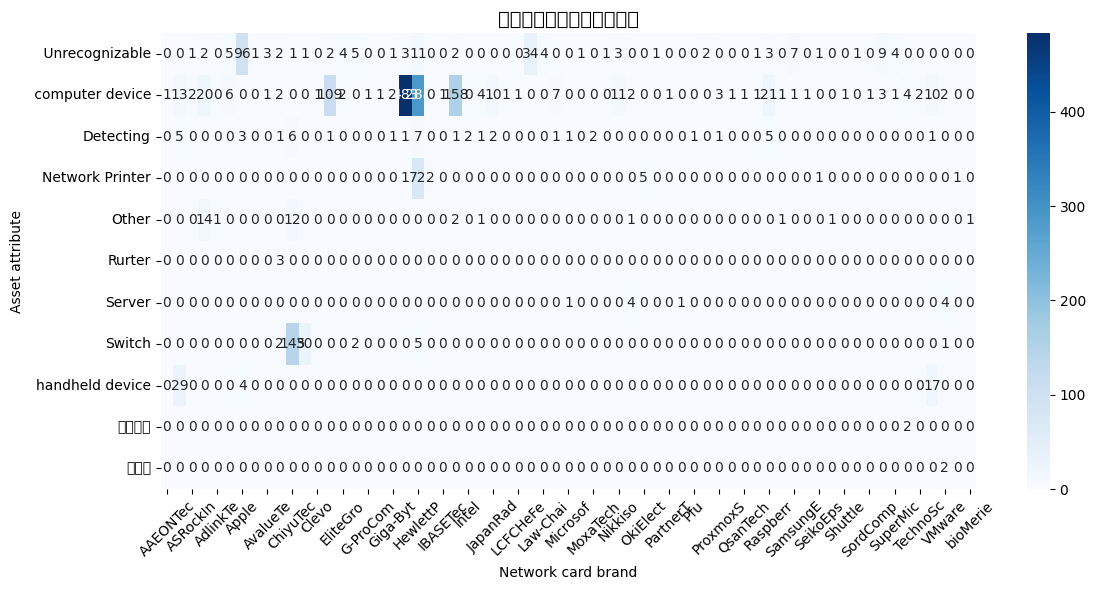

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 設定正確的檔案路徑（請確認上傳路徑是否是 /content）
file_path = "/content/ARPScanner_W-20250623.xlsx"

# 讀取 Excel 檔案中的 Whitelist 工作表
df = pd.read_excel(file_path, sheet_name="Whitelist")

# 將第一列作為欄位名稱
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# 去除欄位名稱的空白
df.columns = [str(col).strip() for col in df.columns]

# 建立交叉表：設備屬性 vs 網卡品牌
device_card_crosstab = pd.crosstab(df["Asset attribute"], df["Network card brand"])

# 繪製熱力圖
plt.figure(figsize=(12, 6))
sns.heatmap(device_card_crosstab, annot=True, fmt="d", cmap="Blues")
plt.title("設備屬性與網卡品牌關聯性", fontsize=14)
plt.xlabel("Network card brand")
plt.ylabel("Asset attribute")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


圖表顯示不同品牌與設備類型的出現次數，橫軸為品牌，縱軸為設備屬性
色彩深淺代表該組合的出現頻率，數字則是實際次數
最高頻率：computer device + IEEERegi（228次）、Unrecognizable + 0（370次）、computer device + HP（158次）
特定品牌僅出現在特定設備，如 Fortinet 僅在 Switch、Dell 和 HP 多用於電腦設備
Realtek 跨多種設備，但出現較少（1或2次

In [ ]:
import pandas as pd

# === 第一步：讀取 Excel ===
file_path = "/content/ARPScanner_W-20250623.xlsx"  # 請依實際路徑調整
df = pd.read_excel(file_path, sheet_name="Whitelist")

# === 第二步：清理欄位與資料 ===
df.columns = df.iloc[0]  # 使用第一列作為欄位名稱
df = df[1:].reset_index(drop=True)
df.columns = [str(col).strip() for col in df.columns]  # 去除欄位名稱空白

# === 第三步：找出 unknown 品牌 且屬於 server/router ===
mask_unknown = df["Network card brand"].astype(str).str.strip() == "0"
mask_device = df["Asset attribute"].isin(["server", "Router"])
suspicious_unknown_devices = df[mask_unknown & mask_device]

# === 第四步：建立交叉表，計算品牌出現次數 ===
device_card_crosstab = pd.crosstab(df["Asset attribute"], df["Network card brand"])
brand_total = device_card_crosstab.sum(axis=0)

# === 第五步：找出出現 1 次的品牌並過濾原始資料 ===
rare_brands = brand_total[brand_total == 1].index.tolist()
rare_brand_devices = df[df["Network card brand"].isin(rare_brands)]

# === 第六步：匯出兩份 CSV 檔案 ===
suspicious_unknown_devices.to_csv("/content/未知品牌但屬於Server_Router的設備.csv", index=False)
rare_brand_devices.to_csv("/content/稀有品牌設備清單.csv", index=False)

print("✅ 匯出完成，請在 /content/ 目錄中查看以下兩個檔案：")
print("1. 未知品牌但屬於Server_Router的設備.csv")
print("2. 稀有品牌設備清單.csv")


✅ 匯出完成，請在 /content/ 目錄中查看以下兩個檔案：
1. 未知品牌但屬於Server_Router的設備.csv
2. 稀有品牌設備清單.csv


/tmp/ipython-input-4-1426148922.py:67: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1426148922.py:67: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1426148922.py:67: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1426148922.py:67: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1426148922.py:67: UserWarning: Glyph 35222 (\N{CJK UNIFIED IDEOGRAPH-8996}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1426148922.py:67: UserWarning: Glyph 35258 (\N{CJK UNIFIED IDEOGRAPH-89BA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1426148922.py:67: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAP

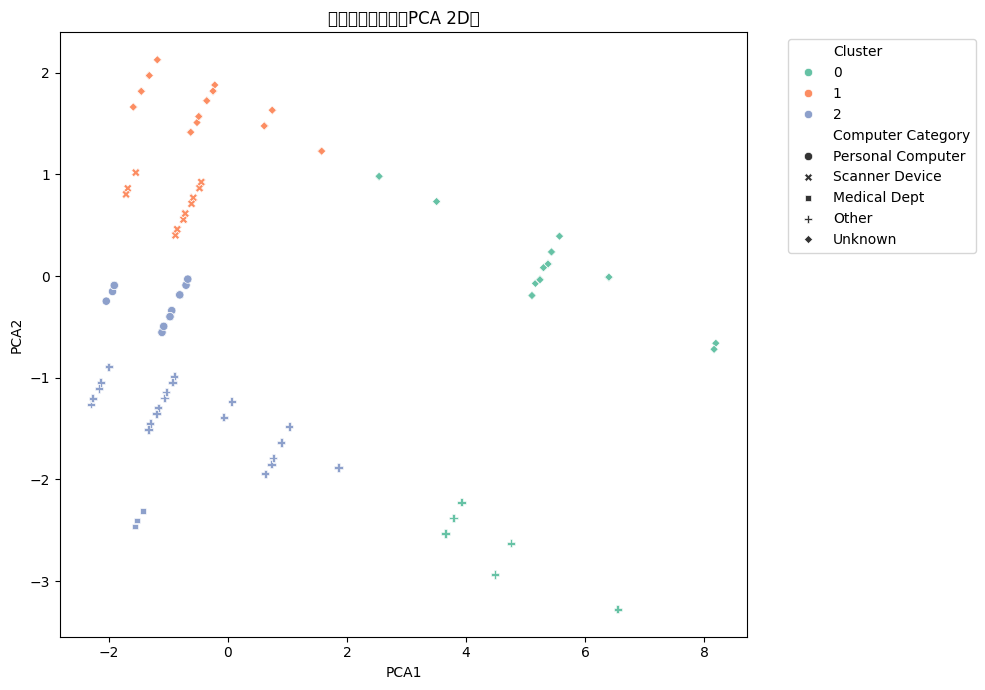

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. 載入並清理資料 ===
file_path = "/content/ARPScanner_W-20250623.xlsx"  # 請依實際位置修改
df = pd.read_excel(file_path, sheet_name="Whitelist")

# 使用第一列作為欄位名稱
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# 去除欄位名稱空白
df.columns = [str(col).strip() for col in df.columns]

# === 2. 建立電腦分類欄位 Computer Category ===
def classify_device(name):
    if pd.isna(name):
        return "Unknown"
    elif str(name).startswith("PC"):
        return "Personal Computer"
    elif str(name).startswith("RP"):
        return "Scanner Device"
    elif "Medical" in str(name):
        return "Medical Dept"
    else:
        return "Other"

df["Computer Category"] = df["Computer name"].apply(classify_device)

# === 3. 準備要進行 Label Encoding 的欄位 ===
features = ["IP type", "Asset attribute", "Computer Category", "Join method", "Group"]
encoded_df = df[features].copy()

# 對每個欄位進行 LabelEncoder 編碼
for col in encoded_df.columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))

# === 4. 分群（你需先有 whitelist_df["Cluster"] 分群結果）===
# 若尚未有，可以用 KMeans 建立
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(encoded_df)

# === 5. PCA 降維並視覺化 ===
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_df)
pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = df["Cluster"]
pca_df["Computer Category"] = df["Computer Category"]
pca_df["Join method"] = df["Join method"]
pca_df["Group"] = df["Group"]

# === 6. 繪圖 ===
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x="PCA1", y="PCA2",
    hue="Cluster",
    style="Computer Category",
    palette="Set2"
)
plt.title("設備分群視覺化（PCA 2D）")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


異常集中群（Cluster 2）：分布明顯異於其他群，可能因設備屬性、部門特殊或手動加入比例高，建議進一步審查。

自動加入設備：可依 Join method 交叉比對分群，分析自動加入設備是否集中於特定群。

機房/醫療區設備：如 Group 名稱出現在特定 Cluster，代表模型能有效區分實體網路區域或用途。

/tmp/ipython-input-5-4222673879.py:60: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:60: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:60: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:60: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:60: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:60: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:60: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAP

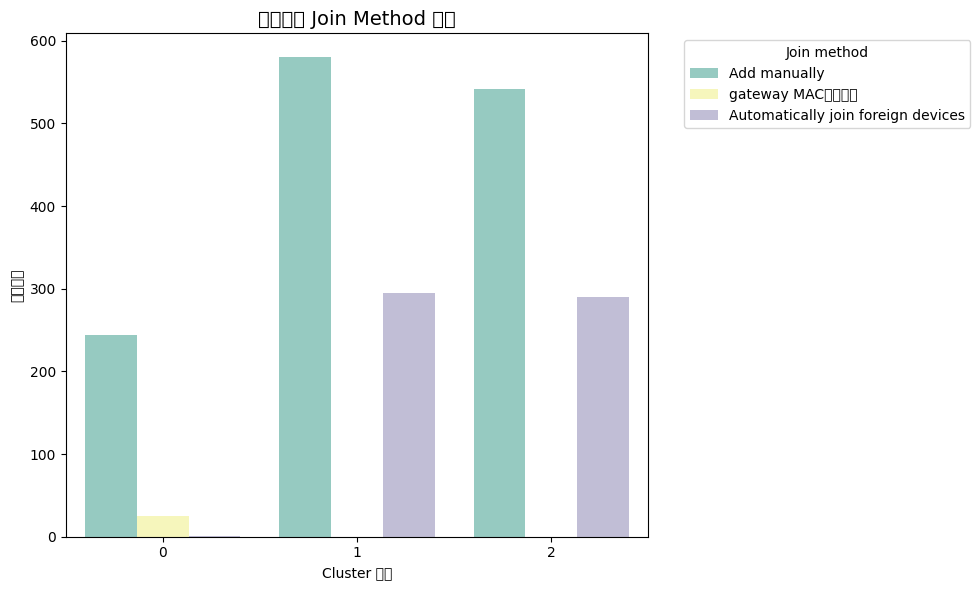

/tmp/ipython-input-5-4222673879.py:73: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:73: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:73: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:73: UserWarning: Glyph 38272 (\N{CJK UNIFIED IDEOGRAPH-9580}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:73: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:73: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-4222673879.py:73: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAP

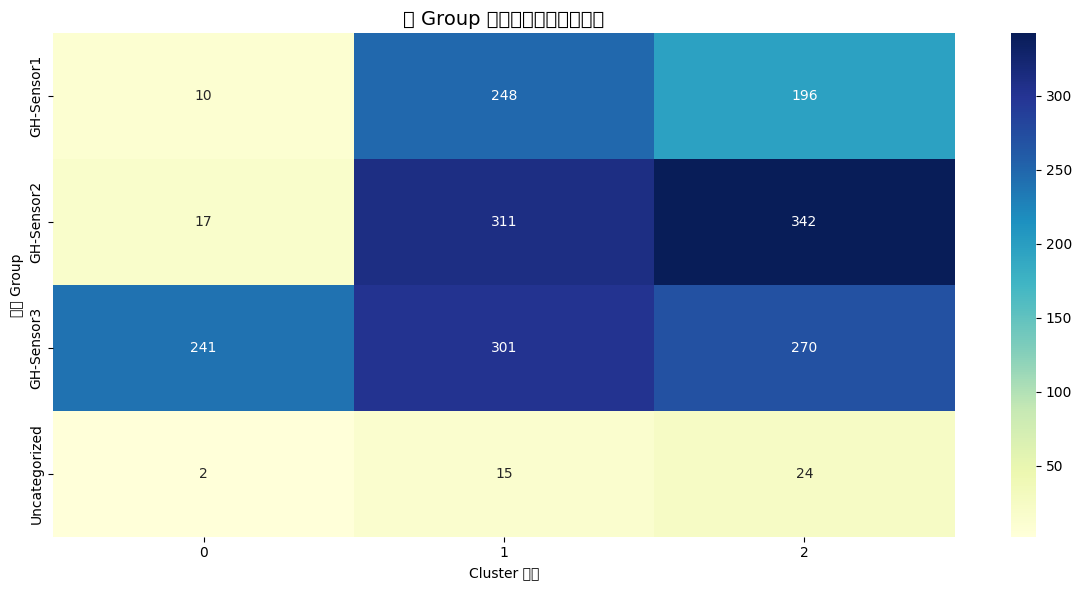

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 讀入 Excel 資料並清理
file_path = "/content/ARPScanner_W-20250623.xlsx"  # ← 請依實際路徑調整
df = pd.read_excel(file_path, sheet_name="Whitelist")

# 將第一列設為欄位名稱，重設資料
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.columns = [str(col).strip() for col in df.columns]  # 去除欄位空白

# 加入分類欄位 Computer Category
def classify_device(name):
    if pd.isna(name):
        return "Unknown"
    elif str(name).startswith("PC"):
        return "Personal Computer"
    elif str(name).startswith("RP"):
        return "Scanner Device"
    elif "Medical" in str(name):
        return "Medical Dept"
    else:
        return "Other"

df["Computer Category"] = df["Computer name"].apply(classify_device)

# 指定為 whitelist_df（供後續使用）
whitelist_df = df


# ================ 準備資料前提：你需要先有分群結果 df["Cluster"] = ... ================

# 假設你已經有一個 dataframe 叫 whitelist_df（含 Cluster 欄位）
# 若尚未建立 Cluster，可以用以下方式：
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# whitelist_df["Cluster"] = kmeans.fit_predict(...)

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

features = ["IP type", "Asset attribute", "Computer Category", "Join method", "Group"]
encoded_df = whitelist_df[features].copy()
for col in encoded_df.columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
whitelist_df["Cluster"] = kmeans.fit_predict(encoded_df)

# ================ 1. 各群集 Join method 分布（長條圖）===============

plt.figure(figsize=(10, 6))
sns.countplot(data=whitelist_df, x="Cluster", hue="Join method", palette="Set3")
plt.title("各群集的 Join Method 分布", fontsize=14)
plt.xlabel("Cluster 群集")
plt.ylabel("設備數量")
plt.legend(title="Join method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ================ 2. 各群集 Group 分布（熱力圖）===============

# 建立交叉表：Group vs Cluster
group_cluster_crosstab = pd.crosstab(whitelist_df["Group"], whitelist_df["Cluster"])

plt.figure(figsize=(12, 6))
sns.heatmap(group_cluster_crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("各 Group 在群集中的分布熱力圖", fontsize=14)
plt.xlabel("Cluster 群集")
plt.ylabel("部門 Group")
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-136733645.py:24: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-136733645.py:24: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-136733645.py:24: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-136733645.py:24: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-136733645.py:24: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-136733645.py:24: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-136733645.py:24: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}

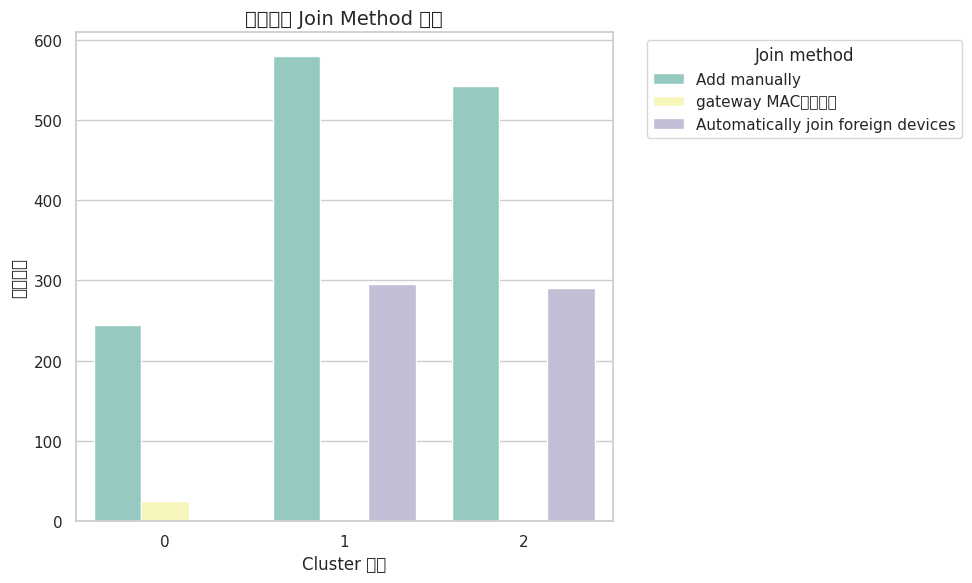

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你已有 whitelist_df 並含有 Cluster 與 Join method 欄位
# 否則請事先定義分群（如用 KMeans）並加入到 whitelist_df["Cluster"]

# 設定畫圖風格（可選）
sns.set(style="whitegrid")

# 繪製群集與 Join method 的分布長條圖
plt.figure(figsize=(10, 6))
sns.countplot(
    data=whitelist_df,
    x="Cluster",
    hue="Join method",
    palette="Set3"
)

# 標題與標籤
plt.title("各群集的 Join Method 分布", fontsize=14)
plt.xlabel("Cluster 群集")
plt.ylabel("設備數量")
plt.legend(title="Join method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



 Asset attribute 為『Other』的設備中所有品牌出現頻率：
  Network card brand  Count
0           asustekc     14
1           chiyutec     12
2                nan      2
3           ieeeregi      2
4           adlinkte      1
5            nutanix      1
6           biomerie      1
7           shenzhen      1
8           intelcor      1
9           realteks      1

 無法辨識網卡品牌的 Other 設備數量：2
                    MAC              IP       Group Network card brand
492   02-1A-CB-87-27-99  172.30.150.177  GH-Sensor3                nan
1806  10-7C-61-BC-19-2A             NaN  GH-Sensor3                nan

 已匯出：Other_Unknown_NIC_Devices.csv


/tmp/ipython-input-7-2305525893.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_counts.head(10), x="Network card brand", y="Count", palette="Set2")
/tmp/ipython-input-7-2305525893.py:57: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2305525893.py:57: UserWarning: Glyph 29986 (\N{CJK UNIFIED IDEOGRAPH-7522}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2305525893.py:57: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2305525893.py:57: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2305525893.py:57: UserWarning: Glyph 22823 (\N{CJK UNIFI

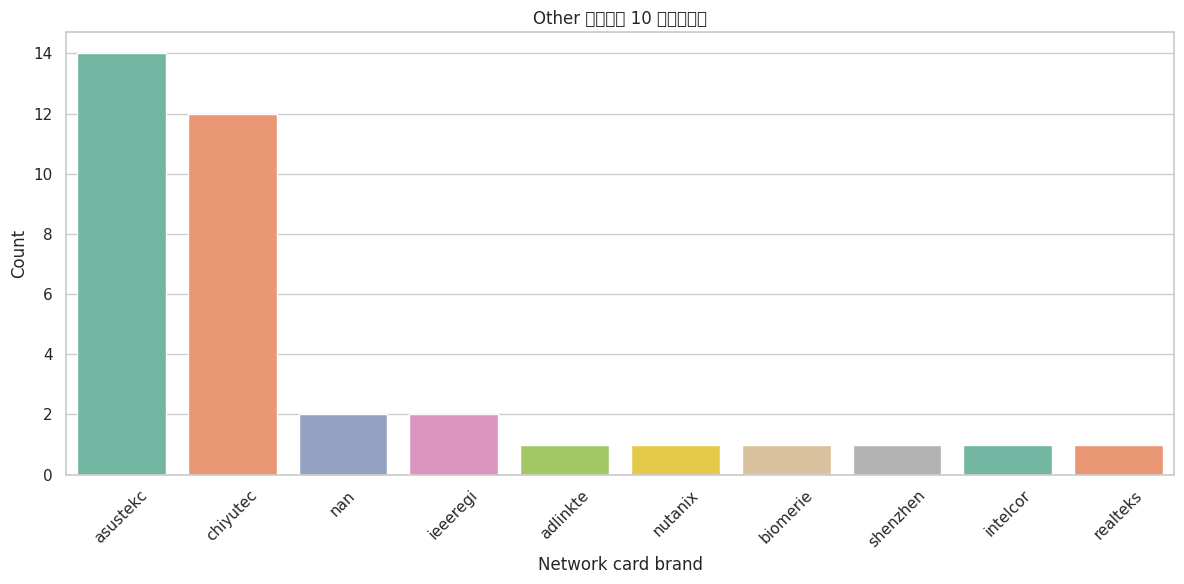

In [ ]:
#這段程式碼會列出品牌為 "0" 或空白的所有設備，通常是無法透過 MAC 對應廠牌者
#同時匯出 Other_Unknown_NIC_Devices.csv 檔案，方便資安稽核或設備確認
#可加值分析是否集中在某些部門、Join method 或特定區段 IP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 讀取 Excel 資料
file_path = "ARPScanner_W-20250623.xlsx"
df = pd.read_excel(file_path)

# 2. 指定資產屬性類別（可改為 'computer device'、'unrecognizable'）
target_asset_type = "Other"  # <<< 請改這裡即可切換

# 3. 整理欄位名稱
df.columns = [
    "MAC", "IP", "Computer name", "IP type", "Asset attribute",
    "OS", "Group", "Network card brand", "Last used date", "Join method"
]

# 4. 清理必要欄位格式
df["Asset attribute"] = df["Asset attribute"].astype(str).str.strip().str.lower()
df["Network card brand"] = df["Network card brand"].astype(str).str.strip().str.lower()
df["Group"] = df["Group"].astype(str).str.strip()

# 5. 篩選指定資產屬性設備（轉小寫比對）
filtered_df = df[df["Asset attribute"] == target_asset_type.lower()].copy()

#  6. 統計品牌出現頻率
brand_counts = filtered_df["Network card brand"].value_counts().reset_index()
brand_counts.columns = ["Network card brand", "Count"]

print(f"\n Asset attribute 為『{target_asset_type}』的設備中所有品牌出現頻率：")
print(brand_counts)

# 7. 定義可疑（無法辨識）品牌清單
suspect_list = ["0", "", "unknown", "n/a", "na", "-", "無", "nan"]
suspicious_devices = filtered_df[filtered_df["Network card brand"].isin(suspect_list)]

# 8. 顯示統計與部分清單
print(f"\n 無法辨識網卡品牌的 {target_asset_type} 設備數量：{len(suspicious_devices)}")
print(suspicious_devices[["MAC", "IP", "Group", "Network card brand"]].head())

# 9. 匯出為 CSV 檔（供稽核用）
csv_filename = f"{target_asset_type}_Unknown_NIC_Devices.csv".replace(" ", "_")
suspicious_devices.to_csv(csv_filename, index=False, encoding="utf-8-sig")
print(f"\n 已匯出：{csv_filename}")

# 10. 視覺化前 10 大品牌（僅當資料存在）
if not brand_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=brand_counts.head(10), x="Network card brand", y="Count", palette="Set2")
    plt.title(f"{target_asset_type} 資產中前 10 大網卡品牌")
    plt.xlabel("Network card brand")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(" 無資料可繪製品牌統計圖。")


--- 分析: 設備屬性與網卡品牌關聯性 ---


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20786 (\N{CJK UNIFIED IDEOGRAPH-5132}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 34395 (\N{CJK UNIFIED IDEOGRAPH-865B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 25836 (\N{CJK UNIFIED IDEOGRAPH-64EC}) missing from fon

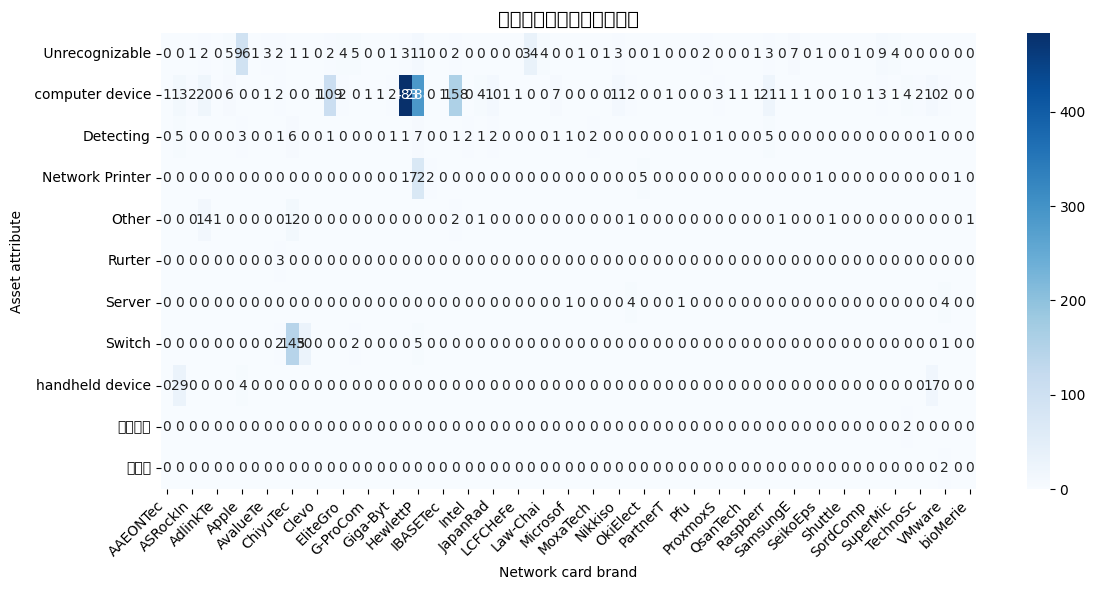

✅ 熱力圖已匯出至 reports 資料夾

--- 分析: 未知品牌 Server/Router 設備 ---
✅ 未知品牌但屬於Server/Router的設備列表已匯出至 reports 資料夾

--- 分析: 稀有品牌設備 ---
✅ 稀有品牌設備清單已匯出至 reports 資料夾

--- 分析: 設備分群與視覺化 (PCA) ---
✅ KMeans 分群完成。


/tmp/ipython-input-1-2144026910.py:125: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:125: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:125: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:125: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:125: UserWarning: Glyph 35222 (\N{CJK UNIFIED IDEOGRAPH-8996}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:125: UserWarning: Glyph 35258 (\N{CJK UNIFIED IDEOGRAPH-89BA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:125: UserWarning: Glyph 21270 (\N{CJK UNIFIED I

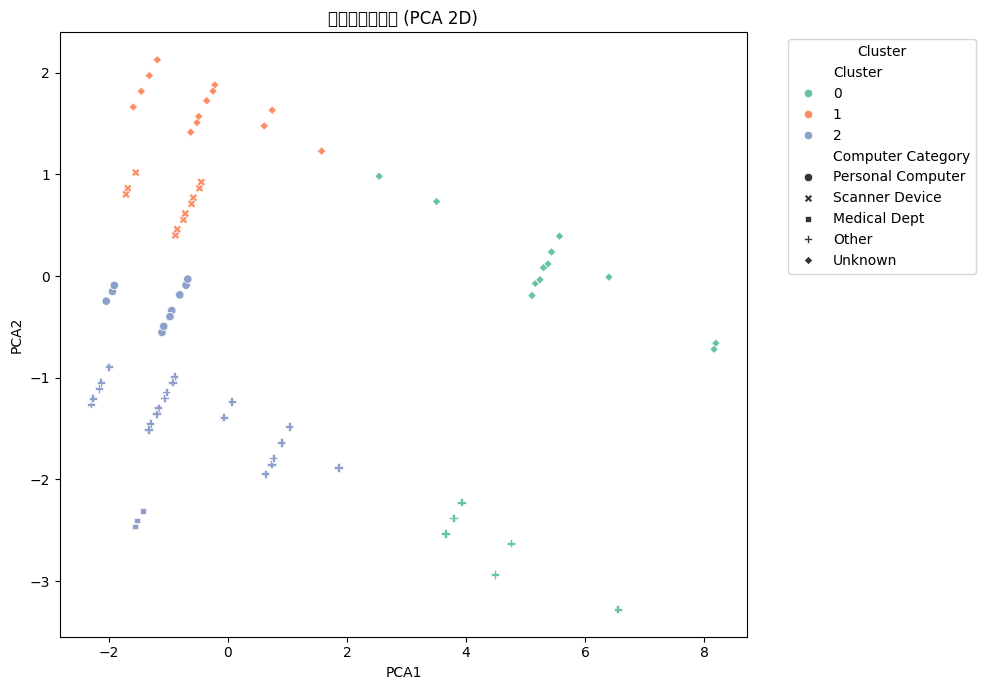

✅ PCA 視覺化圖已匯出至 reports 資料夾

--- 分析: 各群集 Join method 分布 ---


/tmp/ipython-input-1-2144026910.py:143: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:143: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:143: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:143: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:143: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:143: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:143: UserWarning: Glyph 21508 (\N{CJK UNIFIED I

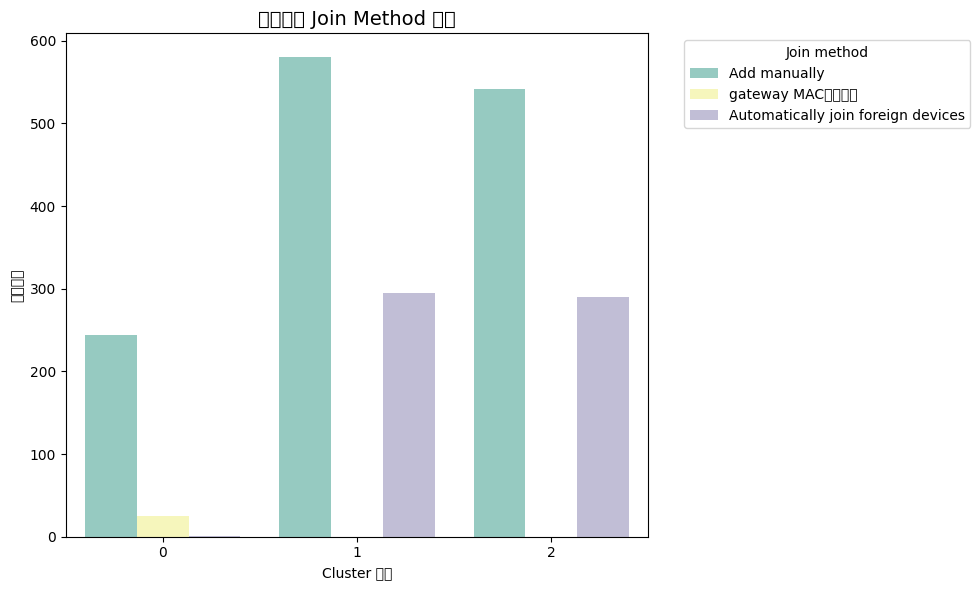

✅ Join Method 分布圖已匯出至 reports 資料夾

--- 分析: 各群集 Group 分布 ---


/tmp/ipython-input-1-2144026910.py:160: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:160: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:160: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:160: UserWarning: Glyph 38272 (\N{CJK UNIFIED IDEOGRAPH-9580}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:160: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:160: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:160: UserWarning: Glyph 20013 (\N{CJK UNIFIED I

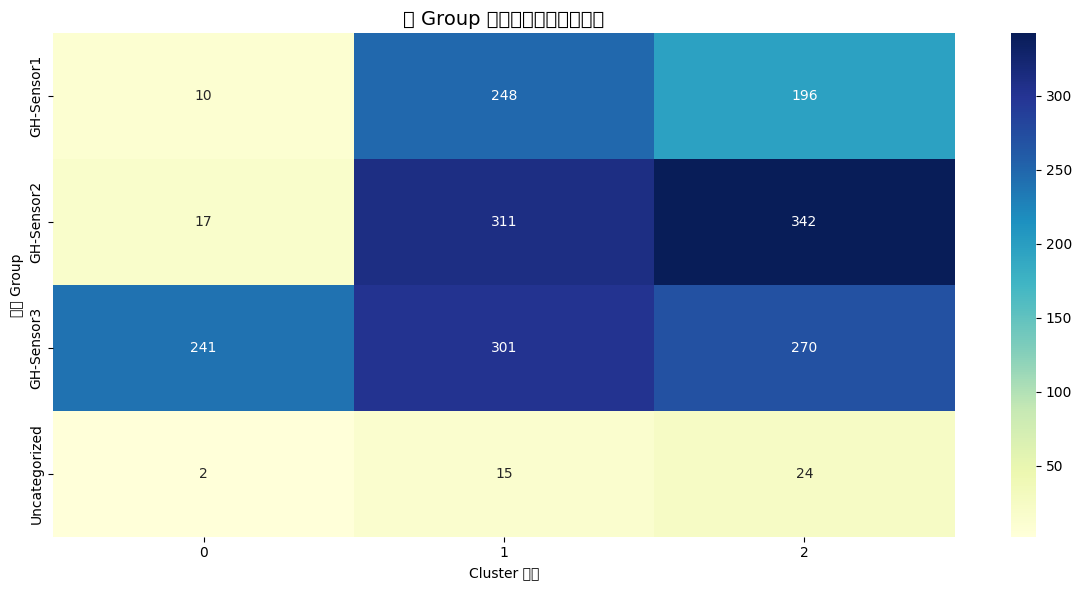

✅ Group 分布熱力圖已匯出至 reports 資料夾

--- 分析: 指定資產屬性中無法辨識品牌設備 ---

=== 分析 Asset attribute 為 『Other』 的設備 ===

  Asset attribute 為『Other』的設備中所有品牌出現頻率：
  Network card brand  Count
0           asustekc     14
1           chiyutec     12
2                nan      2
3           ieeeregi      2
4           adlinkte      1
5            nutanix      1
6           biomerie      1
7           shenzhen      1
8           intelcor      1
9           realteks      1

  無法辨識網卡品牌的 Other 設備數量：2
                    MAC              IP    Computer name       Group  \
491   02-1A-CB-87-27-99  172.30.150.177              NaN  GH-Sensor3   
1805  10-7C-61-BC-19-2A             NaN  DESKTOP-N8B453B  GH-Sensor3   

     Network card brand  
491                 NaN  
1805                NaN  

  已匯出無法辨識網卡品牌的 Other 設備清單至 reports 資料夾：Other_Unknown_NIC_Devices.csv


/tmp/ipython-input-1-2144026910.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_counts.head(10), x="Network card brand", y="Count", palette="Set2")
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 29986 (\N{CJK UNIFIED IDEOGRAPH-7522}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 22823 (\N{CJK

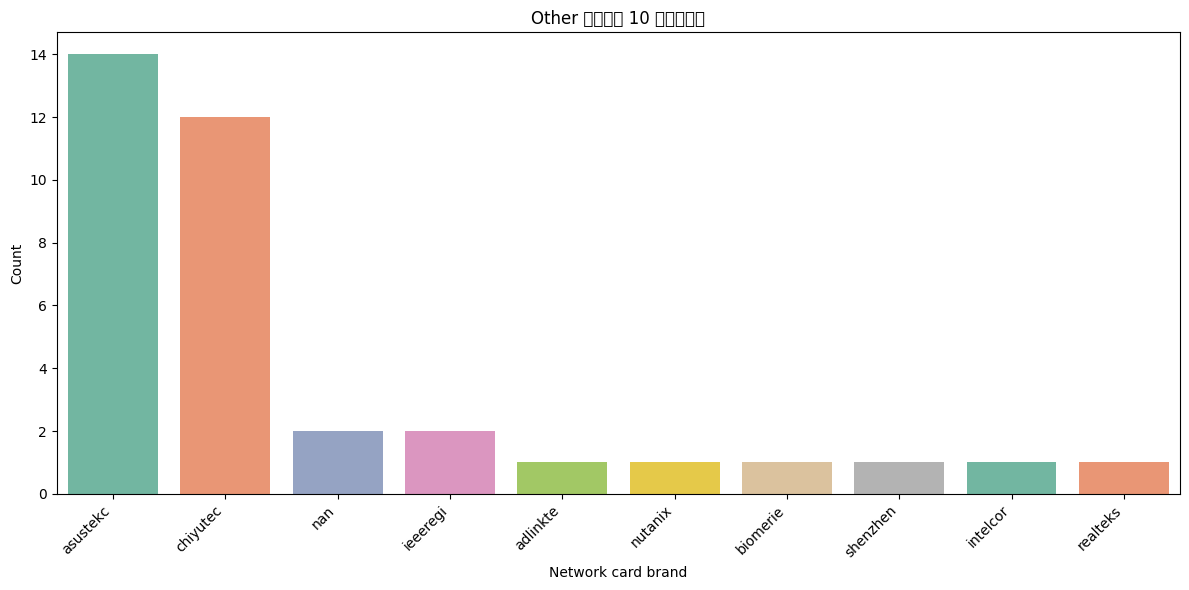

  ✅ 前 10 大網卡品牌統計圖已匯出至 reports 資料夾。

=== 分析 Asset attribute 為 『computer device』 的設備 ===

  Asset attribute 為『computer device』的設備中所有品牌出現頻率：
   Network card brand  Count
0                  hp    483
1            hewlettp    288
2            ieeeregi    158
3                 nan    126
4                dell    109
5            raspberr     21
6            asustekc     20
7            ampaktec     13
8             nikkiso     11
9            japanrad     10
10           universa     10
11           micro-st      7
12           advantec      6
13           synology      4
14           intelcor      4
15           proxmoxs      3
16           giga-byt      3
17           summitda      3
18           azurewav      2
19             vmware      2
20            nutanix      2
21           elitegro      2
22           technosc      2
23           asrockin      2
24           sordcomp      1
25               qnap      1
26              clevo      1
27           partnert      1
28           kontrone

/tmp/ipython-input-1-2144026910.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_counts.head(10), x="Network card brand", y="Count", palette="Set2")
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 29986 (\N{CJK UNIFIED IDEOGRAPH-7522}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 22823 (\N{CJK

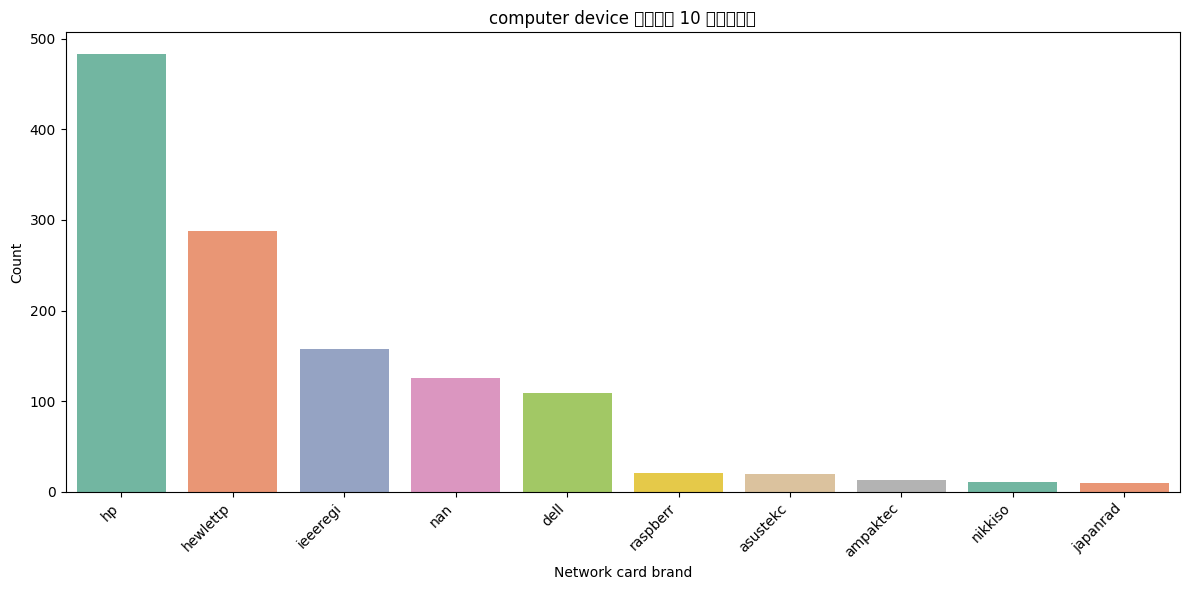

  ✅ 前 10 大網卡品牌統計圖已匯出至 reports 資料夾。

=== 分析 Asset attribute 為 『unrecognizable』 的設備 ===

  Asset attribute 為『unrecognizable』的設備中所有品牌出現頻率：
   Network card brand  Count
0               apple     96
1                 nan     38
2            lairdtec     34
3            hewlettp     11
4            summitda      9
5            samsunge      7
6            advantec      5
7            fortinet      5
8            supermic      4
9            law-chai      4
10           elitegro      4
11                 hp      3
12           raspberr      3
13            nikkiso      3
14           avaluete      3
15           ieeeregi      2
16               dell      2
17           asustekc      2
18           azurewav      2
19           portwell      2
20           mitaccom      1
21              cisco      1
22           seikoeps      1
23           sonicwal      1
24            radisys      1
25           paloalto      1
26           chiyutec      1
27           giga-byt      1
28           asrockin  

/tmp/ipython-input-1-2144026910.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_counts.head(10), x="Network card brand", y="Count", palette="Set2")
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 29986 (\N{CJK UNIFIED IDEOGRAPH-7522}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2144026910.py:215: UserWarning: Glyph 22823 (\N{CJK

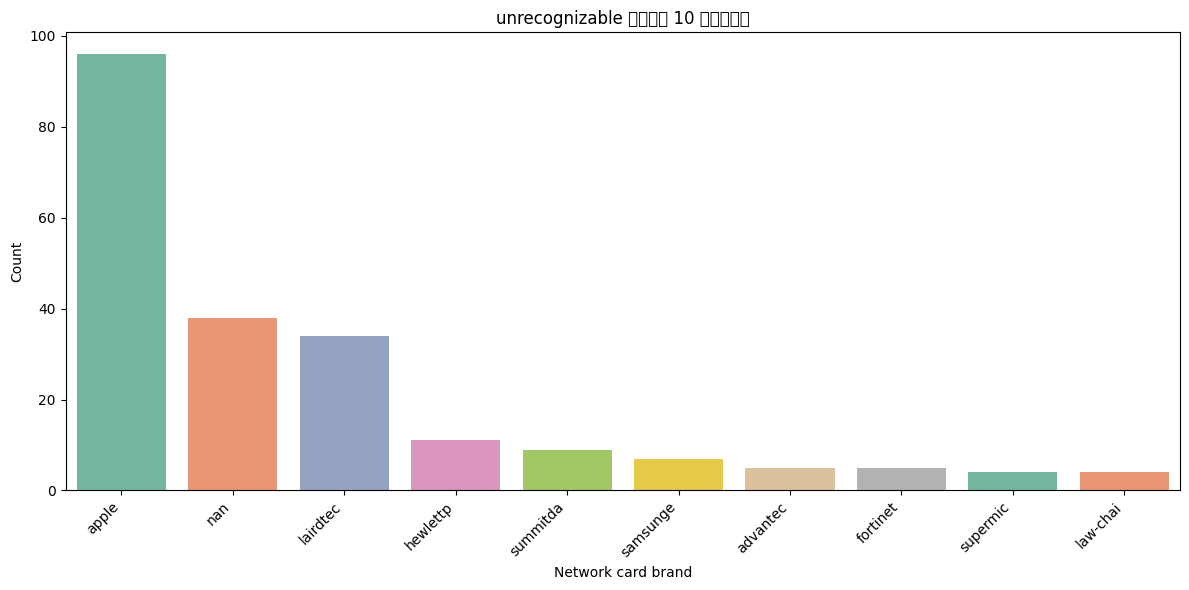

  ✅ 前 10 大網卡品牌統計圖已匯出至 reports 資料夾。

--- 所有分析與報表匯出完成 ---
請查看 /content/reports 資料夾中的報表檔案。


In [ ]:
# prompt: 一鍵分析多個屬性並批次匯出報表

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import os

# --- 設定報告匯出目錄 ---
output_dir = "/content/reports"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"已建立報告匯出目錄: {output_dir}")

# --- 載入並清理資料 ---
file_path = "/content/ARPScanner_W-20250623.xlsx"  # ← 請依實際路徑調整
try:
    df = pd.read_excel(file_path, sheet_name="Whitelist")
except FileNotFoundError:
    print(f"錯誤：檔案未找到，請確認檔案路徑是否正確: {file_path}")
    exit() # 如果檔案找不到就終止程式

# 將第一列設為欄位名稱，重設資料
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.columns = [str(col).strip() for col in df.columns]  # 去除欄位空白

# 加入分類欄位 Computer Category
def classify_device(name):
    if pd.isna(name):
        return "Unknown"
    elif str(name).startswith("PC"):
        return "Personal Computer"
    elif str(name).startswith("RP"):
        return "Scanner Device"
    elif "Medical" in str(name):
        return "Medical Dept"
    else:
        return "Other"

df["Computer Category"] = df["Computer name"].apply(classify_device)

# 指定為 whitelist_df（供後續使用）
whitelist_df = df.copy()


# --- 自動執行所有分析與匯出 ---

# 1. 設備屬性與網卡品牌關聯性 (熱力圖)
print("\n--- 分析: 設備屬性與網卡品牌關聯性 ---")
device_card_crosstab = pd.crosstab(whitelist_df["Asset attribute"], whitelist_df["Network card brand"])
plt.figure(figsize=(12, 6))
sns.heatmap(device_card_crosstab, annot=True, fmt="d", cmap="Blues")
plt.title("設備屬性與網卡品牌關聯性", fontsize=14)
plt.xlabel("Network card brand")
plt.ylabel("Asset attribute")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "asset_attribute_vs_network_card_brand_heatmap.png"))
plt.show()
print("✅ 熱力圖已匯出至 reports 資料夾")


# 2. 找出 unknown 品牌 且屬於 server/router 的設備
print("\n--- 分析: 未知品牌 Server/Router 設備 ---")
mask_unknown = whitelist_df["Network card brand"].astype(str).str.strip() == "0"
mask_device = whitelist_df["Asset attribute"].isin(["server", "Router"])
suspicious_unknown_devices = whitelist_df[mask_unknown & mask_device]
suspicious_unknown_devices.to_csv(os.path.join(output_dir, "suspicious_unknown_server_router_devices.csv"), index=False, encoding="utf-8-sig")
print("✅ 未知品牌但屬於Server/Router的設備列表已匯出至 reports 資料夾")


# 3. 找出出現 1 次的品牌設備
print("\n--- 分析: 稀有品牌設備 ---")
device_card_crosstab = pd.crosstab(whitelist_df["Asset attribute"], whitelist_df["Network card brand"])
brand_total = device_card_crosstab.sum(axis=0)
rare_brands = brand_total[brand_total == 1].index.tolist()
rare_brand_devices = whitelist_df[whitelist_df["Network card brand"].isin(rare_brands)]
rare_brand_devices.to_csv(os.path.join(output_dir, "rare_brand_devices_list.csv"), index=False, encoding="utf-8-sig")
print("✅ 稀有品牌設備清單已匯出至 reports 資料夾")


# 4. 執行 KMeans 分群並視覺化 (PCA)
print("\n--- 分析: 設備分群與視覺化 (PCA) ---")
features = ["IP type", "Asset attribute", "Computer Category", "Join method", "Group"]
encoded_df = whitelist_df[features].copy()
for col in encoded_df.columns:
    # 使用 astype(str) 確保處理非字串型別的資料，並處理可能的NaN值
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str).fillna('Unknown'))

# 確保 encoded_df 的索引與 whitelist_df 一致
encoded_df.index = whitelist_df.index

# 執行 KMeans
try:
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    whitelist_df["Cluster"] = kmeans.fit_predict(encoded_df)
    print("✅ KMeans 分群完成。")

    # 執行 PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(encoded_df)
    pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
    pca_df["Cluster"] = whitelist_df["Cluster"] # 使用 whitelist_df 的 Cluster 結果
    pca_df["Computer Category"] = whitelist_df["Computer Category"] # 加入原始欄位
    pca_df["Join method"] = whitelist_df["Join method"]
    pca_df["Group"] = whitelist_df["Group"]


    # 繪製 PCA 視覺化圖
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        data=pca_df,
        x="PCA1", y="PCA2",
        hue="Cluster",
        style="Computer Category",
        palette="Set2"
    )
    plt.title("設備分群視覺化 (PCA 2D)")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "pca_cluster_visualization.png"))
    plt.show()
    print("✅ PCA 視覺化圖已匯出至 reports 資料夾")

except Exception as e:
    print(f"🚫 分群或 PCA 視覺化失敗: {e}")


# 5. 各群集 Join method 分布 (長條圖)
if "Cluster" in whitelist_df.columns: # 確保分群成功
    print("\n--- 分析: 各群集 Join method 分布 ---")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=whitelist_df, x="Cluster", hue="Join method", palette="Set3")
    plt.title("各群集的 Join Method 分布", fontsize=14)
    plt.xlabel("Cluster 群集")
    plt.ylabel("設備數量")
    plt.legend(title="Join method", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "cluster_join_method_count.png"))
    plt.show()
    print("✅ Join Method 分布圖已匯出至 reports 資料夾")
else:
    print("\n🚫 未找到分群結果 (Cluster)，跳過 Join method 分布分析。")


# 6. 各群集 Group 分布 (熱力圖)
if "Cluster" in whitelist_df.columns: # 確保分群成功
    print("\n--- 分析: 各群集 Group 分布 ---")
    group_cluster_crosstab = pd.crosstab(whitelist_df["Group"], whitelist_df["Cluster"])
    plt.figure(figsize=(12, 6))
    sns.heatmap(group_cluster_crosstab, annot=True, fmt="d", cmap="YlGnBu")
    plt.title("各 Group 在群集中的分布熱力圖", fontsize=14)
    plt.xlabel("Cluster 群集")
    plt.ylabel("部門 Group")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "cluster_group_heatmap.png"))
    plt.show()
    print("✅ Group 分布熱力圖已匯出至 reports 資料夾")
else:
    print("\n🚫 未找到分群結果 (Cluster)，跳過 Group 分布分析。")


# 7. 指定資產屬性 (例如 'Other') 中無法辨識品牌設備清單與統計
print("\n--- 分析: 指定資產屬性中無法辨識品牌設備 ---")
target_asset_types_to_analyze = ["Other", "computer device", "unrecognizable"] # 可自行增減需要分析的屬性清單

for target_asset_type in target_asset_types_to_analyze:
    print(f"\n=== 分析 Asset attribute 為 『{target_asset_type}』 的設備 ===")

    # 篩選指定資產屬性設備（轉小寫比對）
    filtered_df = whitelist_df[
        whitelist_df["Asset attribute"].astype(str).str.strip().str.lower() == target_asset_type.lower()
    ].copy()

    if filtered_df.empty:
        print(f"  沒有找到 Asset attribute 為 『{target_asset_type}』 的設備。")
        continue

    # 統計品牌出現頻率
    brand_counts = filtered_df["Network card brand"].astype(str).str.strip().str.lower().value_counts().reset_index()
    brand_counts.columns = ["Network card brand", "Count"]

    print(f"\n  Asset attribute 為『{target_asset_type}』的設備中所有品牌出現頻率：")
    print(brand_counts)

    # 定義可疑（無法辨識）品牌清單 (已轉小寫)
    suspect_list = ["0", "", "unknown", "n/a", "na", "-", "無", "nan"]
    suspicious_devices_nic = filtered_df[
        filtered_df["Network card brand"].astype(str).str.strip().str.lower().isin(suspect_list)
    ]

    # 顯示統計與部分清單
    print(f"\n  無法辨識網卡品牌的 {target_asset_type} 設備數量：{len(suspicious_devices_nic)}")
    if not suspicious_devices_nic.empty:
        print(suspicious_devices_nic[["MAC", "IP", "Computer name", "Group", "Network card brand"]].head())

    # 匯出為 CSV 檔（供稽核用）
    csv_filename = f"{target_asset_type}_Unknown_NIC_Devices.csv".replace(" ", "_")
    suspicious_devices_nic.to_csv(os.path.join(output_dir, csv_filename), index=False, encoding="utf-8-sig")
    print(f"\n  已匯出無法辨識網卡品牌的 {target_asset_type} 設備清單至 reports 資料夾：{csv_filename}")

    # 視覺化前 10 大品牌（僅當資料存在且不為空）
    if not brand_counts.empty and len(brand_counts) > 0:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=brand_counts.head(10), x="Network card brand", y="Count", palette="Set2")
        plt.title(f"{target_asset_type} 資產中前 10 大網卡品牌")
        plt.xlabel("Network card brand")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"{target_asset_type}_top10_nic_brands.png".replace(" ", "_")))
        plt.show()
        print(f"  ✅ 前 10 大網卡品牌統計圖已匯出至 reports 資料夾。")
    else:
        print(f"  無足夠資料可繪製 {target_asset_type} 的品牌統計圖。")


print("\n--- 所有分析與報表匯出完成 ---")
print(f"請查看 {output_dir} 資料夾中的報表檔案。")



 Asset attribute 為『computer device』的設備中所有網卡品牌出現頻率（含無法辨識）：
   Network card brand  Count
0                  hp    483
1            hewlettp    288
2            ieeeregi    158
3                 nan    126
4                dell    109
5            raspberr     21
6            asustekc     20
7            ampaktec     13
8             nikkiso     11
9            japanrad     10
10           universa     10
11           micro-st      7
12           advantec      6
13           synology      4
14           intelcor      4
15           proxmoxs      3
16           giga-byt      3
17           summitda      3
18           azurewav      2
19             vmware      2
20            nutanix      2
21           elitegro      2
22           technosc      2
23           asrockin      2
24           sordcomp      1
25               qnap      1
26              clevo      1
27           partnert      1
28           kontrone      1
29               seco      1
30           ibasetec      1
31           r

/tmp/ipython-input-2-609862359.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_counts.head(10), x="Network card brand", y="Count", palette="Set2")
/tmp/ipython-input-2-609862359.py:48: UserWarning: Glyph 28858 (\N{CJK UNIFIED IDEOGRAPH-70BA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2-609862359.py:48: UserWarning: Glyph 12302 (\N{LEFT WHITE CORNER BRACKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2-609862359.py:48: UserWarning: Glyph 12303 (\N{RIGHT WHITE CORNER BRACKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2-609862359.py:48: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2-609862359.py:48: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEO

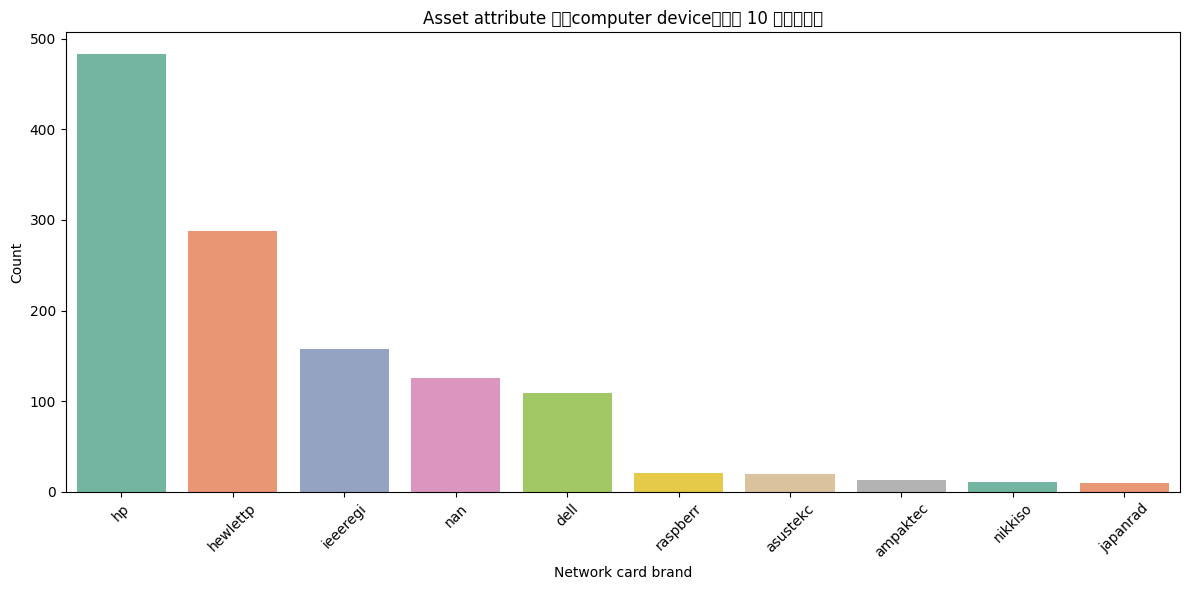

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 載入資料
file_path = "ARPScanner_W-20250623.xlsx"
df = pd.read_excel(file_path)

# 2. 設定欄位名稱
df.columns = [
    "MAC", "IP", "Computer name", "IP type", "Asset attribute",
    "OS", "Group", "Network card brand", "Last used date", "Join method"
]

# 3. 定義要篩選的資產屬性（只要改這一行）
target_asset_type = "computer device"  # 可改為 "other"、"unrecognizable" 等

# 4. 清理欄位格式
df["Asset attribute"] = df["Asset attribute"].astype(str).str.strip().str.lower()
df["Network card brand"] = df["Network card brand"].astype(str).str.strip().str.lower()
df["Group"] = df["Group"].astype(str).str.strip()

# 5. 篩選指定資產屬性
target_devices = df[df["Asset attribute"] == target_asset_type].copy()

# 6. 統計出現的網卡品牌
brand_counts = target_devices["Network card brand"].value_counts().reset_index()
brand_counts.columns = ["Network card brand", "Count"]

print(f" Asset attribute 為『{target_asset_type}』的設備中所有網卡品牌出現頻率（含無法辨識）：")
print(brand_counts)

# 7. 標準化網卡品牌並定義疑似無法辨識清單
suspect_list = ["0", "unknown", "", "none", "na", "n/a", "無", "nan"]
suspicious_devices = target_devices[target_devices["Network card brand"].isin(suspect_list)]

# 8. 顯示可疑設備清單
print(f"\n Asset attribute 為『{target_asset_type}』且無法辨識網卡品牌的設備數量：{len(suspicious_devices)}")
print(suspicious_devices[["MAC", "IP", "Group", "Network card brand"]].head())

# 9. 視覺化前 10 大品牌
if not brand_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=brand_counts.head(10), x="Network card brand", y="Count", palette="Set2")
    plt.title(f"Asset attribute 為『{target_asset_type}』的前 10 大網卡品牌")
    plt.xticks(rotation=45)
    plt.xlabel("Network card brand")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [ ]:
# prompt: 無法辨識網卡品牌的 Other 設備數量 = 1，是在哪一個 group

# 先清理欄位空白，避免 invisible 字元或尾部空格
suspicious["Network card brand"] = suspicious["Network card brand"].astype(str).str.strip()
suspicious["Group"] = suspicious["Group"].astype(str).str.strip()

# 僅過濾出網卡品牌為 'Other' 的設備（處理空白與大小寫問題）
unknown_nic_Other_devices = suspicious[suspicious["Network card brand"].str.lower() == "Other"].copy()

# 統計這些設備在 Group 欄位中的分布
group_distribution = unknown_nic_Other_devices["Group"].value_counts().reset_index()
group_distribution.columns = ["Group", "Count"]

print("\n🔍 無法辨識網卡品牌的 Other 設備在各 Group 的分布：")
print(group_distribution)

# === 找出數量為 1 的設備所在的 Group ===
single_count_groups = group_distribution[group_distribution["Count"] == 1]

if not single_count_groups.empty:
    print("\n📌 數量為 1 的 '無法辨識網卡品牌的 Other 設備' 所在的 Group：")
    for index, row in single_count_groups.iterrows():
        group_name = row["Group"]
        # 找到該設備的詳細資訊
        device_info = unknown_nic_Other_devices[unknown_nic_Other_devices["Group"] == group_name][["MAC", "IP", "Group", "Network card brand"]]
        print(f"\nGroup: {group_name}")
        print(device_info.to_string(index=False))
else:
    print("\n✅ 沒有 Group 中只出現 1 台網卡品牌為 'Other' 的設備。")


NameError: name 'suspicious' is not defined

In [ ]:
#無法辨識設備使用的網卡廠牌統計
import pandas as pd

# 假設你已經有 whitelist_df 且其中含 "Asset attribute" 與 "Network card brand"
# 1️⃣ 標準化 Asset attribute 欄位（去空白與小寫）
df["Asset attribute"] = df["Asset attribute"].astype(str).str.strip()

# 2️⃣ 篩選 "Unrecognizable" 設備
unrec_devices = df[df["Asset attribute"] == "Unrecognizable"]

df["Network card brand"] = df["Network card brand"].astype(str).str.strip()

# 3️⃣ 統計這些設備的網卡品牌
unrec_brand_counts = unrec_devices["Network card brand"].value_counts().reset_index()
unrec_brand_counts.columns = ["Network card brand", "Count"]

# 4️⃣ 顯示結果
print("所有 'Unrecognizable' 設備的網卡品牌統計：")
print(unrec_brand_counts)




所有 'Unrecognizable' 設備的網卡品牌統計：
Empty DataFrame
Columns: [Network card brand, Count]
Index: []


In [ ]:
# prompt: 找出不明網卡品牌的資產屬性清單

# 這個區塊的程式碼會找出在 'Asset attribute' 為 'Unrecognizable' 的設備中，網卡品牌為 '0' 或空白的設備清單及其資產屬性。

# 1. 確認 DataFrame `df` 已經載入並清理過，包含 'Asset attribute' 和 'Network card brand' 欄位。
#    假設之前的程式碼已執行，且 `df` 是清理後的 DataFrame。

# 2. 標準化 'Asset attribute' 和 'Network card brand' 欄位
df["Asset attribute"] = df["Asset attribute"].astype(str).str.strip()
df["Network card brand"] = df["Network card brand"].astype(str).str.strip()

# 3. 定義不明網卡品牌的清單（已考慮大小寫）
unknown_brands = ["0", "", "unknown", "n/a", "na", "-", "無", "nan"]

# 4. 篩選出 'Asset attribute' 為 'Unrecognizable' 且網卡品牌為不明的設備
unrecognizable_unknown_nic_devices = df[
    (df["Asset attribute"].str.lower() == "unrecognizable") &
    (df["Network card brand"].str.lower().isin(unknown_brands))
].copy()

# 5. 顯示這些設備的資產屬性清單 (只顯示相關欄位)
print("\n=== 資產屬性為『Unrecognizable』且網卡品牌不明的設備清單 ===")
if not unrecognizable_unknown_nic_devices.empty:
    # 選擇要顯示的欄位
    display_cols = [
        "MAC", "IP", "Computer name", "IP type", "Asset attribute",
        "OS", "Group", "Network card brand", "Last used date", "Join method"
    ]
    # 過濾出 df 中存在的欄位
    display_cols_present = [col for col in display_cols if col in unrecognizable_unknown_nic_devices.columns]

    print(unrecognizable_unknown_nic_devices[display_cols_present].to_string(index=False))

    # 匯出為 CSV 檔案
    output_csv_path = os.path.join(output_dir, "Unrecognizable_Unknown_NIC_Asset_List.csv")
    unrecognizable_unknown_nic_devices.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
    print(f"\n✅ 清單已匯出至：{output_csv_path}")

else:
    print("  沒有找到資產屬性為『Unrecognizable』且網卡品牌不明的設備。")



=== 資產屬性為『Unrecognizable』且網卡品牌不明的設備清單 ===
              MAC             IP Computer name IP type Asset attribute  OS      Group Network card brand      Last used date  Join method
2C-58-B9-88-F4-B9    172.18.1.16    PC11351121       M  unrecognizable NaN GH-Sensor1                nan 2025/06/23 06:46:00 Add manually
2C-CF-67-3B-CB-5B 172.30.198.192           NaN       M  unrecognizable NaN GH-Sensor3                nan 2025/06/23 06:34:32 Add manually
2C-CF-67-3B-CA-6C 172.30.198.200           NaN       M  unrecognizable NaN GH-Sensor3                nan 2025/06/23 06:34:32 Add manually
A4-A4-90-0F-BF-D2 172.30.201.124           NaN       M  unrecognizable NaN GH-Sensor3                nan 2025/06/23 06:34:27 Add manually
A4-A4-90-0F-C1-2E 172.30.201.161           NaN       M  unrecognizable NaN GH-Sensor3                nan 2025/06/23 06:34:28 Add manually
A4-A4-90-0F-BF-AA 172.30.201.162           NaN       M  unrecognizable NaN GH-Sensor3                nan 2025/06/23 06:34:28 Add 

In [ ]:
# prompt: 找出不明網卡設備為Other的清單

# === 找出不明網卡設備為Other的清單 ===

# 確保 DataFrame `df` 已經載入並清理過
# 假設前面的程式碼已執行，且 `df` 是清理後的 DataFrame

# 1. 標準化 'Asset attribute' 和 'Network card brand' 欄位
df["Asset attribute"] = df["Asset attribute"].astype(str).str.strip()
df["Network card brand"] = df["Network card brand"].astype(str).str.strip()

# 2. 定義不明網卡品牌的清單（已考慮大小寫）
unknown_brands = ["0", "", "unknown", "n/a", "na", "-", "無", "nan"]

# 3. 篩選出 'Asset attribute' 為 'Other' 且網卡品牌為不明的設備
other_unknown_nic_devices = df[
    (df["Asset attribute"].str.lower() == "other") &
    (df["Network card brand"].str.lower().isin(unknown_brands))
].copy()

# 4. 顯示這些設備的清單 (只顯示相關欄位)
print("\n=== 資產屬性為『Other』且網卡品牌不明的設備清單 ===")
if not other_unknown_nic_devices.empty:
    # 選擇要顯示的欄位
    display_cols = [
        "MAC", "IP", "Computer name", "IP type", "Asset attribute",
        "OS", "Group", "Network card brand", "Last used date", "Join method"
    ]
    # 過濾出 df 中存在的欄位
    display_cols_present = [col for col in display_cols if col in other_unknown_nic_devices.columns]

    print(other_unknown_nic_devices[display_cols_present].to_string(index=False))

    # 匯出為 CSV 檔案
    output_csv_path = os.path.join(output_dir, "Other_Unknown_NIC_Asset_List.csv")
    other_unknown_nic_devices.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
    print(f"\n✅ 清單已匯出至：{output_csv_path}")

else:
    print("  沒有找到資產屬性為『Other』且網卡品牌不明的設備。")


=== 資產屬性為『Other』且網卡品牌不明的設備清單 ===
              MAC             IP   Computer name IP type Asset attribute  OS      Group Network card brand      Last used date  Join method
02-1A-CB-87-27-99 172.30.150.177             NaN       M           other NaN GH-Sensor3                nan 2025/06/23 06:34:36 Add manually
10-7C-61-BC-19-2A            NaN DESKTOP-N8B453B       M           other NaN GH-Sensor3                nan 2025/06/20 13:25:36 Add manually

✅ 清單已匯出至：/content/reports/Other_Unknown_NIC_Asset_List.csv


In [ ]:
# prompt: 找出不明網卡，設備為Other、 Unrecognizable、Detecting的清單

# === 找出不明網卡設備為 Detecting 的清單 ===

# 確保 DataFrame `df` 已經載入並清理過
# 假設前面的程式碼已執行，且 `df` 是清理後的 DataFrame

# 1. 標準化 'Asset attribute' 和 'Network card brand' 欄位
df["Asset attribute"] = df["Asset attribute"].astype(str).str.strip()
df["Network card brand"] = df["Network card brand"].astype(str).str.strip()

# 2. 定義不明網卡品牌的清單（已考慮大小寫）
unknown_brands = ["0", "", "unknown", "n/a", "na", "-", "無", "nan"]

# 3. 篩選出 'Asset attribute' 為 'Detecting' 且網卡品牌為不明的設備
detecting_unknown_nic_devices = df[
    (df["Asset attribute"].str.lower() == "detecting") &
    (df["Network card brand"].str.lower().isin(unknown_brands))
].copy()

# 4. 顯示這些設備的清單 (只顯示相關欄位)
print("\n=== 資產屬性為『Detecting』且網卡品牌不明的設備清單 ===")
if not detecting_unknown_nic_devices.empty:
    # 選擇要顯示的欄位
    display_cols = [
        "MAC", "IP", "Computer name", "IP type", "Asset attribute",
        "OS", "Group", "Network card brand", "Last used date", "Join method"
    ]
    # 過濾出 df 中存在的欄位
    display_cols_present = [col for col in display_cols if col in detecting_unknown_nic_devices.columns]

    print(detecting_unknown_nic_devices[display_cols_present].to_string(index=False))

    # 匯出為 CSV 檔案
    output_csv_path = os.path.join(output_dir, "Detecting_Unknown_NIC_Asset_List.csv")
    detecting_unknown_nic_devices.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
    print(f"\n✅ 清單已匯出至：{output_csv_path}")

else:
    print("  沒有找到資產屬性為『Detecting』且網卡品牌不明的設備。")




=== 資產屬性為『Detecting』且網卡品牌不明的設備清單 ===
              MAC  IP   Computer name IP type Asset attribute  OS         Group Network card brand      Last used date  Join method
2C-58-B9-88-F2-69 NaN             NaN       M       detecting NaN    GH-Sensor3                nan 2025/06/19 11:42:52 Add manually
2C-58-B9-88-F5-40 NaN             NaN       M       detecting NaN    GH-Sensor3                nan 2025/06/19 11:59:50 Add manually
2C-58-B9-88-F2-7C NaN             NaN       M       detecting NaN    GH-Sensor3                nan 2025/06/19 10:44:55 Add manually
2C-58-B9-88-F2-19 NaN USER1-8VUML20NB       M       detecting NaN    GH-Sensor3                nan 2025/06/19 13:33:41 Add manually
2C-58-B9-8D-66-E8 NaN USER1-TLUUR7AKJ       M       detecting NaN    GH-Sensor3                nan 2025/06/20 08:43:17 Add manually
2C-58-B9-88-F4-A5 NaN             NaN       M       detecting NaN Uncategorized                nan                 NaN Add manually

✅ 清單已匯出至：/content/reports/Detecting_U

In [ ]:
# prompt: 找出不明網卡、設備為Detecting、Other、 Unrecognizable、Computer name空白的清單

import pandas as pd
# === 找出不明網卡、設備為Detecting、Other、 Unrecognizable、Computer name空白的清單 ===

# 確保 DataFrame `df` 已經載入並清理過
# 假設前面的程式碼已執行，且 `df` 是清理後的 DataFrame，包含以下欄位：
# ["MAC", "IP", "Computer name", "IP type", "Asset attribute", "OS", "Group", "Network card brand", "Last used date", "Join method"]

# 1. 標準化相關欄位
df["Asset attribute"] = df["Asset attribute"].astype(str).str.strip()
df["Network card brand"] = df["Network card brand"].astype(str).str.strip()
df["Computer name"] = df["Computer name"].astype(str).str.strip() # 標準化 Computer name

# 2. 定義不明網卡品牌的清單（已考慮大小寫）
unknown_brands = ["0", "", "unknown", "n/a", "na", "-", "無", "nan"]

# 3. 定義目標資產屬性清單
target_attributes = ["detecting", "other", "unrecognizable"]

# 4. 篩選符合條件的設備
# 條件：
#   - Asset attribute 在目標清單中 (不分大小寫)
#   - Network card brand 在不明品牌清單中 (不分大小寫)
#   - Computer name 為空白 (空白字串或 NaN)
suspicious_devices_combined = df[
    (df["Asset attribute"].str.lower().isin(target_attributes)) &
    (df["Network card brand"].str.lower().isin(unknown_brands)) &
    (df["Computer name"].replace('', pd.NA).isna()) # 將空白字串替換為 NA 後檢查是否為 NA
].copy()

# 5. 顯示這些設備的清單 (只顯示相關欄位)
print("\n=== 不明網卡、資產屬性為Detecting/Other/Unrecognizable、且電腦名稱空白的設備清單 ===")
if not suspicious_devices_combined.empty:
    # 選擇要顯示的欄位
    display_cols = [
        "MAC", "IP", "Computer name", "IP type", "Asset attribute",
        "OS", "Group", "Network card brand", "Last used date", "Join method"
    ]
    # 過濾出 df 中存在的欄位
    display_cols_present = [col for col in display_cols if col in suspicious_devices_combined.columns]

    print(suspicious_devices_combined[display_cols_present].to_string(index=False))

    # 匯出為 CSV 檔案
    output_csv_path = os.path.join(output_dir, "Suspicious_Unknown_NIC_Blank_ComputerName_List.csv")
    suspicious_devices_combined.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
    print(f"\n✅ 清單已匯出至：{output_csv_path}")

else:
    print("  沒有找到符合條件的設備。")



=== 不明網卡、資產屬性為Detecting/Other/Unrecognizable、且電腦名稱空白的設備清單 ===
  沒有找到符合條件的設備。


In [ ]:
# prompt: 不明網卡、 Unrecognizable 或Detecting或Other，與Computer name、OS為空值的清單

import pandas as pd
# === 找出不明網卡、資產屬性為Detecting/Other/Unrecognizable，且電腦名稱或OS空白的清單 ===

# 確保 DataFrame `df` 已經載入並清理過
# 假設前面的程式碼已執行，且 `df` 是清理後的 DataFrame，包含以下欄位：
# ["MAC", "IP", "Computer name", "IP type", "Asset attribute", "OS", "Group", "Network card brand", "Last used date", "Join method"]

# 1. 標準化相關欄位
df["Asset attribute"] = df["Asset attribute"].astype(str).str.strip()
df["Network card brand"] = df["Network card brand"].astype(str).str.strip()
df["Computer name"] = df["Computer name"].astype(str).str.strip() # 標準化 Computer name
df["OS"] = df["OS"].astype(str).str.strip() # 標準化 OS

# 2. 定義不明網卡品牌的清單（已考慮大小寫）
unknown_brands = ["0", "", "unknown", "n/a", "na", "-", "無", "nan"]

# 3. 定義目標資產屬性清單
target_attributes = ["detecting", "other", "unrecognizable"]

# 4. 篩選符合條件的設備
# 條件：
#   - Asset attribute 在目標清單中 (不分大小寫)
#   - Network card brand 在不明品牌清單中 (不分大小寫)
#   - Computer name 為空白 (空白字串或 NaN) 或 OS 為空白 (空白字串或 NaN)
suspicious_devices_combined_cn_os = df[
    (df["Asset attribute"].str.lower().isin(target_attributes)) &
    (df["Network card brand"].str.lower().isin(unknown_brands)) &
    (
        (df["Computer name"].replace('', pd.NA).isna()) | # Computer name 是空白或 NaN
        (df["OS"].replace('', pd.NA).isna())              # OS 是空白或 NaN
    )
].copy()

# 5. 顯示這些設備的清單 (只顯示相關欄位)
print("\n=== 不明網卡、資產屬性為Detecting/Other/Unrecognizable，且電腦名稱或OS空白的設備清單 ===")
if not suspicious_devices_combined_cn_os.empty:
    # 選擇要顯示的欄位
    display_cols = [
        "MAC", "IP", "Computer name", "IP type", "Asset attribute",
        "OS", "Group", "Network card brand", "Last used date", "Join method"
    ]
    # 過濾出 df 中存在的欄位
    display_cols_present = [col for col in display_cols if col in suspicious_devices_combined_cn_os.columns]

    print(suspicious_devices_combined_cn_os[display_cols_present].to_string(index=False))

    # 匯出為 CSV 檔案
    output_csv_path = os.path.join(output_dir, "Suspicious_Unknown_NIC_Blank_ComputerName_OS_List.csv")
    suspicious_devices_combined_cn_os.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
    print(f"\n✅ 清單已匯出至：{output_csv_path}")

else:
    print("  沒有找到符合條件的設備。")




=== 不明網卡、資產屬性為Detecting/Other/Unrecognizable，且電腦名稱或OS空白的設備清單 ===
  沒有找到符合條件的設備。


In [ ]:
# prompt: 找出跟不明網卡對應，computer name為空值、Asset attribute為Other的清單

import pandas as pd
# === 找出不明網卡、資產屬性為Other、且電腦名稱空白的清單 ===

# 確保 DataFrame `df` 已經載入並清理過
# 假設前面的程式碼已執行，且 `df` 是清理後的 DataFrame，包含以下欄位：
# ["MAC", "IP", "Computer name", "IP type", "Asset attribute", "OS", "Group", "Network card brand", "Last used date", "Join method"]

# 1. 標準化相關欄位
df["Asset attribute"] = df["Asset attribute"].astype(str).str.strip()
df["Network card brand"] = df["Network card brand"].astype(str).str.strip()
df["Computer name"] = df["Computer name"].astype(str).str.strip() # 標準化 Computer name

# 2. 定義不明網卡品牌的清單（已考慮大小寫）
unknown_brands = ["0", "", "unknown", "n/a", "na", "-", "無", "nan"]

# 3. 定義目標資產屬性清單
target_attribute = "other"

# 4. 篩選符合條件的設備
# 條件：
#   - Asset attribute 是 'other' (不分大小寫)
#   - Network card brand 在不明品牌清單中 (不分大小寫)
#   - Computer name 為空白 (空白字串或 NaN)
suspicious_devices_other_blank_cn = df[
    (df["Asset attribute"].str.lower() == target_attribute) &
    (df["Network card brand"].str.lower().isin(unknown_brands)) &
    (df["Computer name"].replace('', pd.NA).isna()) # 將空白字串替換為 NA 後檢查是否為 NA
].copy()

# 5. 顯示這些設備的清單 (只顯示相關欄位)
print(f"\n=== 資產屬性為『{target_attribute.capitalize()}』、不明網卡、且電腦名稱空白的設備清單 ===")
if not suspicious_devices_other_blank_cn.empty:
    # 選擇要顯示的欄位
    display_cols = [
        "MAC", "IP", "Computer name", "IP type", "Asset attribute",
        "OS", "Group", "Network card brand", "Last used date", "Join method"
    ]
    # 過濾出 df 中存在的欄位
    display_cols_present = [col for col in display_cols if col in suspicious_devices_other_blank_cn.columns]

    print(suspicious_devices_other_blank_cn[display_cols_present].to_string(index=False))

    # 匯出為 CSV 檔案
    output_csv_path = os.path.join(output_dir, f"{target_attribute.capitalize()}_Unknown_NIC_Blank_ComputerName_List.csv")
    suspicious_devices_other_blank_cn.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
    print(f"\n✅ 清單已匯出至：{output_csv_path}")

else:
    print(f"  沒有找到資產屬性為『{target_attribute.capitalize()}』、不明網卡、且電腦名稱空白的設備。")



=== 資產屬性為『Other』、不明網卡、且電腦名稱空白的設備清單 ===
  沒有找到資產屬性為『Other』、不明網卡、且電腦名稱空白的設備。


In [ ]:
#找出「不明網卡品牌設備清單」（品牌為 "0" 或空白）設備清單
import pandas as pd

# 假設你已經讀入 Excel 並命名為 df，如果尚未讀取請加上：
# df = pd.read_excel("/content/ARPScanner_W-20250616.xlsx", sheet_name="Whitelist")

# ===  清理網卡品牌欄位（移除空白與統一型別）===
df["Network card brand"] = df["Network card brand"].astype(str).str.strip()

# === 篩選：品牌為 "0" 或空白 ===
unknown_brand_devices = df[
    (df["Network card brand"] == "0") |
    (df["Network card brand"] == "")
]

# ===  顯示結果或匯出 CSV（視需求）===
print("📋 不明網卡品牌設備清單：")
print(unknown_brand_devices[["MAC", "IP", "Computer name", "Asset attribute", "Group", "Join method", "Network card brand"]])

# （選用）儲存為 CSV 檔案
unknown_brand_devices.to_csv("/content/不明網卡品牌_設備清單.csv", index=False)


📋 不明網卡品牌設備清單：
Empty DataFrame
Columns: [MAC, IP, Computer name, Asset attribute, Group, Join method, Network card brand]
Index: []


In [ ]:
#「出現次數最多的網卡品牌」的所有設備清單
import pandas as pd

# 假設你已經有 dataframe 叫 df，尚未讀取可用：
# df = pd.read_excel("/content/ARPScanner_W-20250619.xlsx", sheet_name="Whitelist")

# Step 1️⃣ 清理品牌欄位空白與型態
df["Network card brand"] = df["Network card brand"].astype(str).str.strip()

# Step 2️⃣ 找出出現次數最多的品牌
top_brand = df["Network card brand"].value_counts().idxmax()
print(f"📌 出現最多次的品牌為：{top_brand}")

# Step 3️⃣ 篩選所有屬於該品牌的設備
top_brand_devices = df[df["Network card brand"] == top_brand]

# Step 4️⃣ 顯示前幾筆資料作確認
print(top_brand_devices[["MAC", "IP", "Computer name", "Asset attribute", "Group", "Join method", "Network card brand"]].head())

# Step 5️⃣ 匯出為 CSV
output_path = f"/content/出現最多品牌_{top_brand}_設備清單.csv"
top_brand_devices.to_csv(output_path, index=False)
print(f"✅ 已匯出檔案至：{output_path}")


📌 出現最多次的品牌為：hp
                  MAC           IP Computer name  Asset attribute       Group  \
2   E8-D8-D1-C9-50-5B  172.18.1.17    RP10971044  computer device  GH-Sensor1   
8   84-69-93-06-90-B3  172.18.1.32    RP11191121  computer device  GH-Sensor1   
12  E8-D8-D1-C9-50-93  172.18.1.43    RP10971038  computer device  GH-Sensor1   
15  E8-D8-D1-C9-50-AD  172.18.1.47    RP10971040  computer device  GH-Sensor1   
17  E8-D8-D1-C9-49-FF  172.18.1.50    RP10971039  computer device  GH-Sensor1   

     Join method Network card brand  
2   Add manually                 hp  
8   Add manually                 hp  
12  Add manually                 hp  
15  Add manually                 hp  
17  Add manually                 hp  
✅ 已匯出檔案至：/content/出現最多品牌_hp_設備清單.csv


/tmp/ipython-input-14-2383890500.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_dist, x="Cluster", y="Device Count", palette="Set2")
/tmp/ipython-input-14-2383890500.py:51: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-2383890500.py:51: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-2383890500.py:51: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-2383890500.py:51: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-2383890500.py:51: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEO

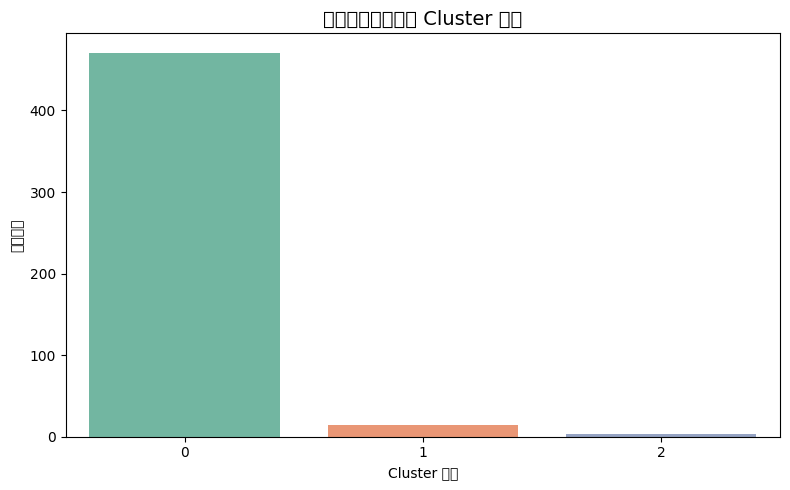

/tmp/ipython-input-14-2383890500.py:59: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-2383890500.py:59: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-2383890500.py:59: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-2383890500.py:59: UserWarning: Glyph 29260 (\N{CJK UNIFIED IDEOGRAPH-724C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-2383890500.py:59: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-2383890500.py:59: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-2383890500.py:59: UserWarning: Glyph 22312 (\N{CJK UNIFIED I

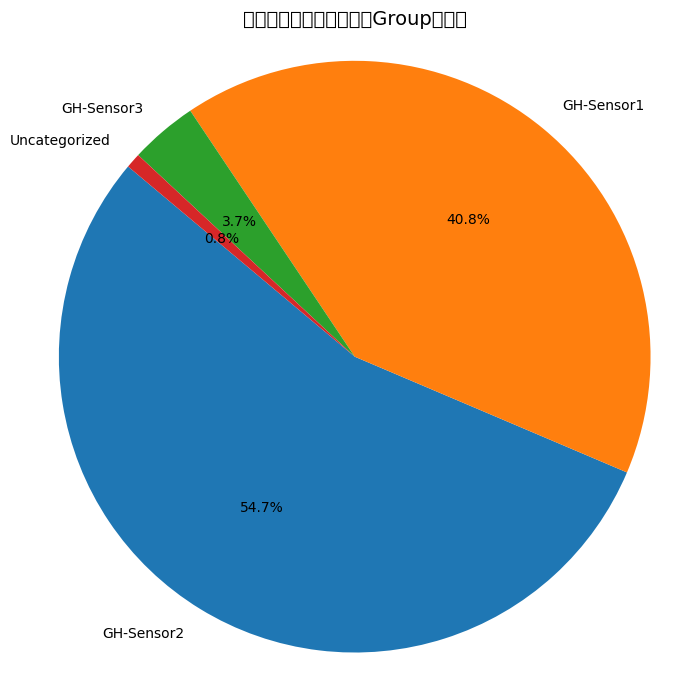

In [ ]:
#分析這些設備是否集中在特定群集（Cluster）或部門（Group）
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# ---------- 預處理 ----------
df["Network card brand"] = df["Network card brand"].astype(str).str.strip()
df["Asset attribute"] = df["Asset attribute"].astype(str).str.strip()

# 加入分類欄位（依電腦名稱規則）
def classify_device(name):
    if pd.isna(name):
        return "Unknown"
    elif str(name).startswith("PC"):
        return "Personal Computer"
    elif str(name).startswith("RP"):
        return "Scanner Device"
    elif "Medical" in str(name):
        return "Medical Dept"
    else:
        return "Other"
df["Computer Category"] = df["Computer name"].apply(classify_device)

# ---------- 群集分析 ----------
features = ["IP type", "Asset attribute", "Computer Category", "Join method", "Group"]
encoded_df = df[features].copy()
for col in encoded_df.columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(encoded_df)

# ---------- 找出最多品牌 ----------
top_brand = df["Network card brand"].value_counts().idxmax()
top_brand_devices = df[df["Network card brand"] == top_brand]

# ---------- 分布統計 ----------
cluster_dist = top_brand_devices["Cluster"].value_counts().reset_index()
cluster_dist.columns = ["Cluster", "Device Count"]

group_dist = top_brand_devices["Group"].value_counts().reset_index()
group_dist.columns = ["Group", "Device Count"]

# ---------- 繪圖（長條圖）----------
plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_dist, x="Cluster", y="Device Count", palette="Set2")
plt.title("最多品牌設備在各 Cluster 分布", fontsize=14)
plt.xlabel("Cluster 群集")
plt.ylabel("設備數量")
plt.tight_layout()
plt.show()

# ---------- 繪圖（圓餅圖）----------
plt.figure(figsize=(7, 7))
plt.pie(group_dist["Device Count"], labels=group_dist["Group"], autopct='%1.1f%%', startangle=140)
plt.title("最多品牌設備在各部門（Group）分布", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.show()


In [ ]:
#「已知品牌 vs 不明品牌」在不同分群（Cluster）中的分布情況
import pandas as pd
import matplotlib.pyplot as plt

# 假設 df 已經是你的設備資料集，包含 "Network card brand" 與分群後的 "Cluster" 欄位

# 1. 建立品牌分類欄位（已知 vs 不明）
df["Brand Label"] = df["Network card brand"].apply(lambda x: "Unknown" if str(x).strip() in ["", "0"] else "Known")

# 2. 建立交叉表：Cluster vs Brand Label
brand_cluster_crosstab = pd.crosstab(df["Cluster"], df["Brand Label"]).reset_index()

# 3. 繪製堆疊長條圖
stacked_df = brand_cluster_crosstab.set_index("Cluster")[["Known", "Unknown"]]
stacked_df.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="tab20c")
plt.title("Comparison of Known vs Unknown Brands Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Device Count")
plt.legend(title="Brand Type")
plt.tight_layout()
plt.show()

# 4. Optional：輸出比較表格
print(brand_cluster_crosstab)
brand_cluster_crosstab.to_csv("品牌類型與群集分布比較.csv", index=False)



KeyError: "['Unknown'] not in index"

In [ ]:
#各分群裡的項目
import pandas as pd

# 確保欄位有清理
df["Asset attribute"] = df["Asset attribute"].astype(str).str.strip()
df["Group"] = df["Group"].astype(str).str.strip()
df["Join method"] = df["Join method"].astype(str).str.strip()
df["Computer Category"] = df["Computer Category"].astype(str).str.strip()

# 欲摘要的欄位
summary_columns = ["Cluster", "Asset attribute", "Group", "Join method", "Computer Category"]

# 建立每個群集的摘要資料
cluster_summary = []

# 依 Cluster 群分別處理
for cluster_id in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"] == cluster_id]
    summary = {"Cluster": cluster_id}
    for col in summary_columns[1:]:
        top_value = subset[col].value_counts().idxmax()
        count = subset[col].value_counts().max()
        summary[col] = f"{top_value} ({count} items)"
    cluster_summary.append(summary)

# 建立 DataFrame
cluster_summary_df = pd.DataFrame(cluster_summary)

# 顯示結果（若你不在 ChatGPT 環境，可使用 print 或 to_csv）
print(cluster_summary_df)

# 若要匯出成 CSV 可加上這行：
cluster_summary_df.to_csv("cluster_summary.csv", index=False)


   Cluster               Asset attribute                   Group  \
0        0  computer device (1109 items)  GH-Sensor2 (624 items)   
1        1   computer device (199 items)  GH-Sensor3 (371 items)   
2        2    unrecognizable (250 items)  GH-Sensor3 (389 items)   

                                      Join method           Computer Category  
0  Automatically join foreign devices (555 items)  Scanner Device (550 items)  
1                        Add manually (392 items)           Other (406 items)  
2                        Add manually (420 items)           Other (440 items)  


In [ ]:
# prompt: 在各分群裡的Group

import pandas as pd
# 在各分群裡的Group

# 確保欄位有清理
df["Group"] = df["Group"].astype(str).str.strip()

# 建立每個群集裡 Group 的摘要資料
cluster_group_summary = []

# 依 Cluster 群分別處理
for cluster_id in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"] == cluster_id]
    # 統計每個 Group 在該群集中的數量
    group_counts = subset["Group"].value_counts().reset_index()
    group_counts.columns = ["Group", "Count"]

    # 將該群集的 Group 分布轉成一個字串格式
    group_distribution = ", ".join([f"{row['Group']} ({row['Count']})" for index, row in group_counts.iterrows()])

    cluster_group_summary.append({"Cluster": cluster_id, "Group Distribution": group_distribution})

# 建立 DataFrame
cluster_group_summary_df = pd.DataFrame(cluster_group_summary)

# 顯示結果
print("各分群裡的 Group 分布：")
print(cluster_group_summary_df)

# 若要匯出成 CSV 可加上這行：
cluster_group_summary_df.to_csv("cluster_group_distribution.csv", index=False)


各分群裡的 Group 分布：
   Cluster                                 Group Distribution
0        0  GH-Sensor2 (624), GH-Sensor1 (433), GH-Sensor3...
1        1  GH-Sensor3 (371), Uncategorized (37), GH-Senso...
2        2  GH-Sensor3 (389), GH-Sensor2 (40), GH-Sensor1 ...


In [ ]:
import pandas as pd

# 假設 df 是你之前讀取並已經包含 Cluster 的 DataFrame

# Step 1️：標準化品牌欄位
df["Network card brand"] = df["Network card brand"].astype(str).str.strip().str.lower()

# Step 2️：定義 Unknown 品牌條件
def is_unknown_brand(brand):
    return brand in ["", "0", "unknown", "n/a", "na", "無"]

df["is_unknown_brand"] = df["Network card brand"].apply(is_unknown_brand)

# Step 3️：指定你要查看的群集編號
target_cluster_id = 1  # ← 可改成 0、1、2 等

# Step 4️：篩選出符合條件的資料
unknown_brand_in_cluster = df[
    (df["Cluster"] == target_cluster_id) &
    (df["is_unknown_brand"])
]

# Step 5️：顯示統計
print(f"📦 在 Cluster {target_cluster_id} 中，Unknown 品牌設備數量：{len(unknown_brand_in_cluster)}")

# Step 6️：若有資料，則匯出
if len(unknown_brand_in_cluster) > 0:
    output_path = f"Cluster_{target_cluster_id}_Unknown_Devices_Fixed.csv"
    unknown_brand_in_cluster.to_csv(output_path, index=False)
    print(f" 匯出成功：{output_path}")
else:
    print(" 沒有符合條件的設備（可能資料中品牌不為 '0'、空白或 unknown）")

# Step 7️（選用）：列出所有實際出現過的品牌
print("\n 所有出現過的品牌種類：")
print(df["Network card brand"].value_counts())


📦 在 Cluster 1 中，Unknown 品牌設備數量：0
 沒有符合條件的設備（可能資料中品牌不為 '0'、空白或 unknown）

 所有出現過的品牌種類：
Network card brand
hp          488
hewlettp    383
nan         172
chiyutec    164
ieeeregi    163
           ... 
armorlin      1
pfu           1
lcfchefe      1
aaeontec      1
shuttle       1
Name: count, Length: 66, dtype: int64
